In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

##### 1. Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [15]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.columns[df.isnull().any()].tolist()
### có 2 cột 'Description', 'CustomerID' là có dữ liệu bị khuyết thiếu

['Description', 'CustomerID']

In [5]:
df.isna().sum()
### Description với 1454
### CustomerID là 135080

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### 2. Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao
Với 'CustomeID' chúng ta nên xóa đi cột này vì không thể điền vào 1 giá trị khác khi mỗi khách 
hàng có ID riêngvà các ID điền vào sẽ không có khách hàng nào mang ID đó.
Với 'Description' thì chúng ta nên điền vào một giá trị tương ứng vì các hàng có Description là null có thể chứa dữ liệu quan trọng

##### 3. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

In [22]:
df['Description'] = df[['Description']].fillna('don\'t know')

In [28]:
df[(df['Description'] == 'don\'t know')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,don't know,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,don't know,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,don't know,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,don't know,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,don't know,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,don't know,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,don't know,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,don't know,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,don't know,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [29]:
df.drop( columns=('CustomerID'), inplace=True)

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


##### 4. Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

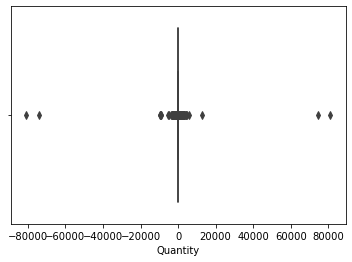

In [33]:
# xác định ngoại lai bằng phương pháp trực quan hóa.
sns.boxplot(x=df['Quantity']);

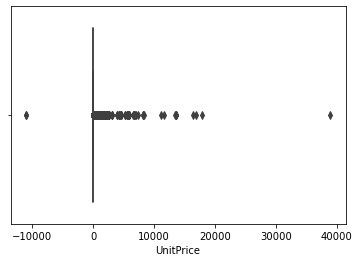

In [34]:
sns.boxplot(x=df['UnitPrice']);

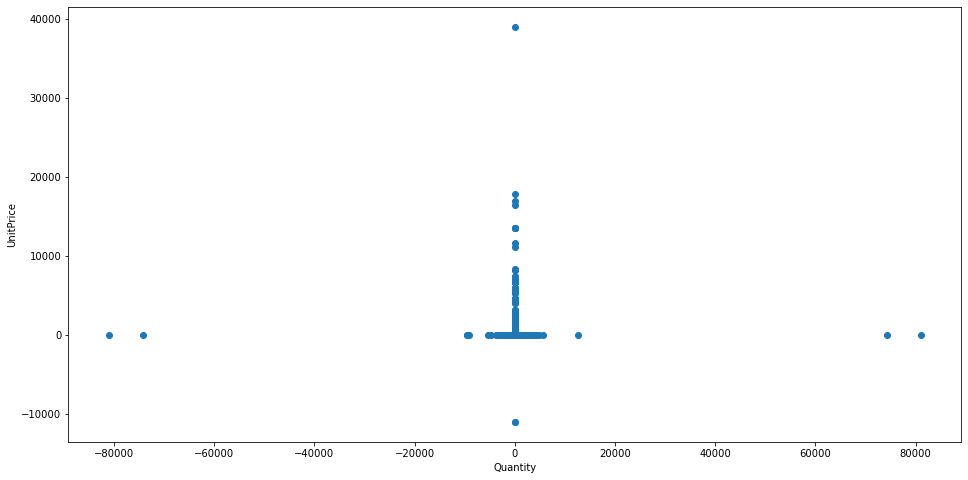

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

In [53]:
### Xác định ngoại lai bằng toán học
z = np.abs(stats.zscore(df[['Quantity','UnitPrice']]))
z

,Quantity,UnitPrice
0,0.016289,0.021301
1,0.016289,0.012620
2,0.007118,0.019234
3,0.016289,0.012620
4,0.016289,0.012620
...,...,...
541904,0.011224,0.038871
541905,0.016289,0.025952
541906,0.025460,0.004766
541907,0.025460,0.004766


In [54]:
## Giả sữ điểm ngoại lai sẽ lớn hơn 15
threshold = 15
np.where(z > threshold)
## mảng 1 là số hàng, mảng 2 là số cột

(array([  4287,  15016,  15017,  16232,  16313,  16356,  16357,  43702,
         43703,  61619,  61624,  73446,  74614,  96844,  96845,  97432,
        115818, 117052, 117053, 117054, 117055, 119631, 119632, 124741,
        124787, 135533, 144826, 144829, 144831, 144834, 150591, 150615,
        173277, 173382, 173391, 191385, 191386, 206121, 220843, 222681,
        225528, 225529, 225530, 232891, 232894, 239250, 239251, 262413,
        262414, 268027, 268028, 268431, 268432, 271151, 287103, 287150,
        293842, 297438, 297723, 299982, 299983, 299984, 312092, 312246,
        329628, 341601, 342611, 342635, 342996, 343000, 347947, 347948,
        374542, 383495, 406404, 406405, 406406, 406407, 421632, 422351,
        422375, 422376, 429248, 429249, 431348, 431381, 446434, 446533,
        449817, 467436, 471487, 493020, 502058, 502122, 508459, 509370,
        524601, 524602, 524892, 525134, 528082, 533491, 537254, 540421,
        540422, 541540], dtype=int64),
 array([0, 1, 1, 1, 1, 1,

In [57]:
# z[4287][1]

In [59]:
## dùng IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Quantity     9.00
UnitPrice    2.88
dtype: float64

In [67]:
# Điểm ngoại lai sẽ là những điểm mà nằm dưới Q1 ít nhất là 1.5*IQR, hoặc nằm trên Q3 ít nhất là 1.5*IQR.
print((df[['Quantity','UnitPrice']] < (Q1 - 1.5 * IQR)) | (df[['Quantity','UnitPrice']] > (Q3 + 1.5 * IQR)))

        Quantity  UnitPrice
0          False      False
1          False      False
2          False      False
3          False      False
4          False      False
...          ...        ...
541904     False      False
541905     False      False
541906     False      False
541907     False      False
541908     False      False

[541909 rows x 2 columns]


##### 5. Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch

In [68]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_19680/3000358658.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [70]:
df1.shape

(444108, 7)

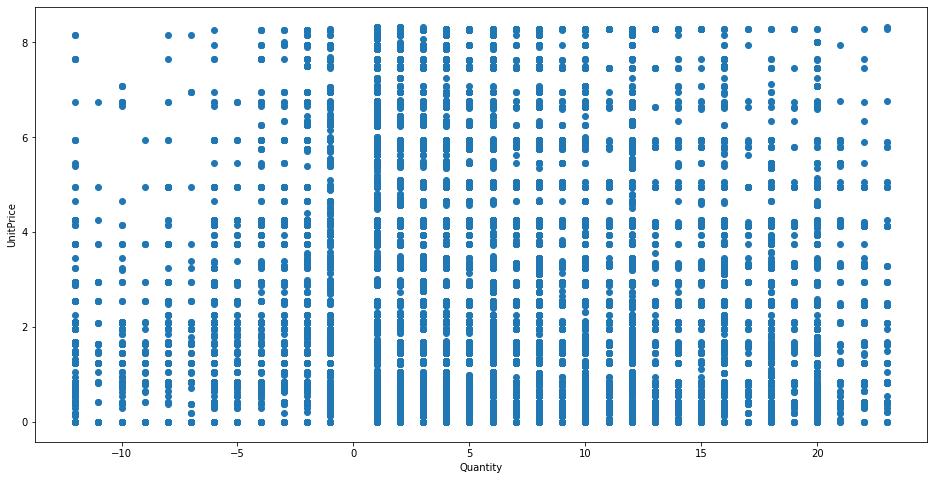

In [71]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['Quantity'], df1['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

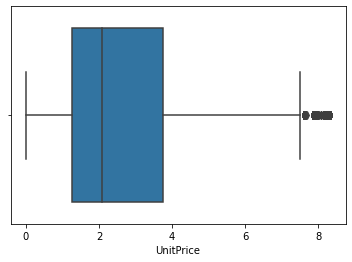

In [72]:
sns.boxplot(x=df1['UnitPrice']);

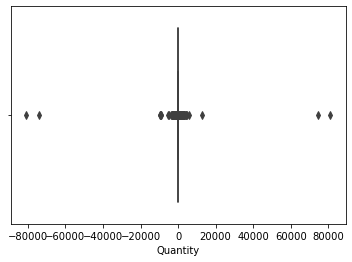

In [73]:
sns.boxplot(x=df['Quantity']);